<a href="https://colab.research.google.com/github/abhijadhav14/Extended-Language-Detection/blob/main/NaiveBias_LD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/extended_language_detection_data_set_3000.csv")
print(data.head(10))

   ID               Text Sample  Length  Word Count  Average Word Length  \
0   1  Bonjour, comment ça va ?      25           4                 4.75   
1   2        Hola, ¿cómo estás?      19           3                 3.67   
2   3                   你好，你好吗？       9           3                 1.67   
3   4         Привет, как дела?      21           3                 3.67   
4   5   Hallo, wie geht es dir?      25           5                 3.20   
5   6          Ciao, come stai?      17           3                 3.67   
6   7             こんにちは、お元気ですか？      19           5                 2.40   
7   8            안녕하세요, 잘 지내세요?      18           4                 3.00   
8   9        Merhaba, nasılsın?      19           3                 4.33   
9  10      नमस्ते, आप कैसे हैं?      23           4                 3.75   

   Vowel Count  Consonant Count  Unique Words  Stop Words Count  \
0            9               11             4                 1   
1            7               

In [21]:
data["Language"].value_counts()


,count
Language,
Korean,229
Portuguese,223
Hindi,222
German,222
French,217
Italian,200
Chinese,200
Spanish,194
Japanese,193


In [15]:
print(data.columns)

Index(['ID', 'Text Sample', 'Length', 'Word Count', 'Average Word Length',
       'Vowel Count', 'Consonant Count', 'Unique Words', 'Stop Words Count',
       'Special Characters', 'Digit Count', 'Punctuation Count',
       'Uppercase Count', 'Lowercase Count', 'Has Accents', 'Has Diacritics',
       'Character Diversity', 'Language Family', 'Script Type', 'Language'],
      dtype='object')


In [16]:
X = data["Text Sample"]
y = data["Language"]

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(3020, 69)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [24]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
print("Accuracy % is :",ac * 100)

Accuracy is : 0.9966887417218543
Accuracy % is : 99.66887417218543


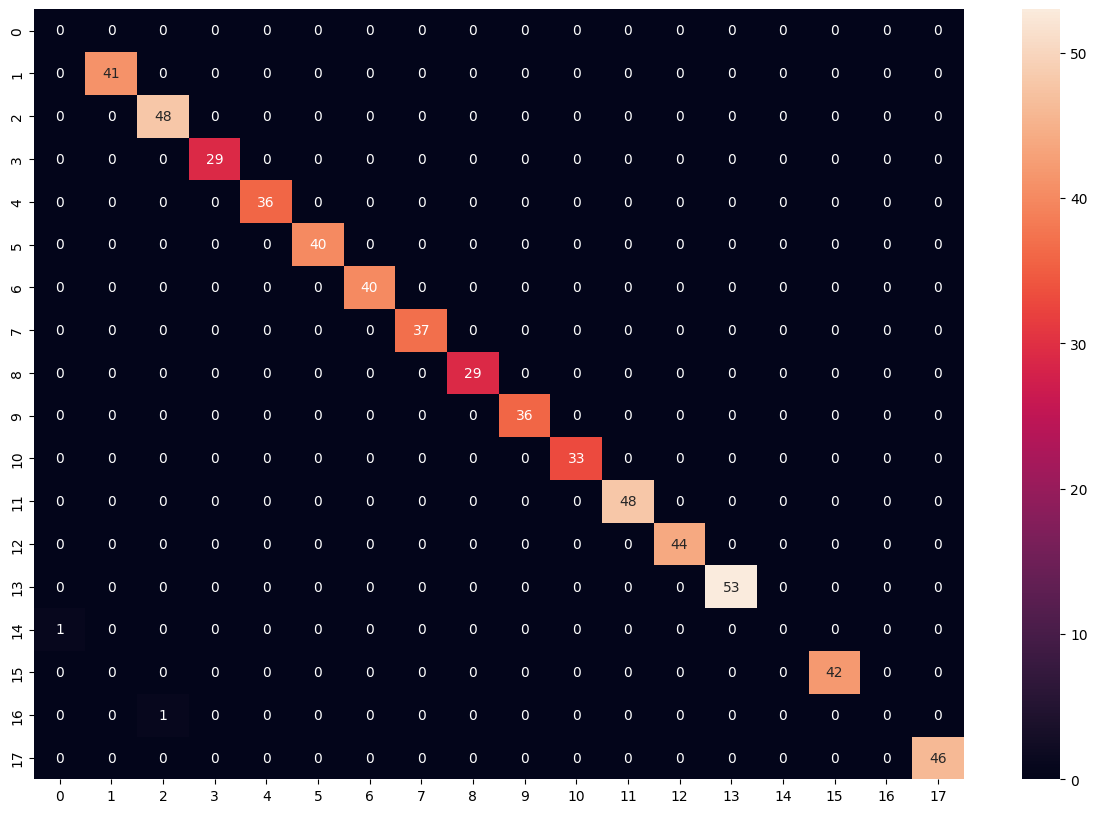

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [30]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [33]:
predict("Привет, как дела?")

The langauge is in Russian


In [34]:
predict("Hello, how are you?")

The langauge is in English


In [36]:
predict("Ciao, come stai?")

The langauge is in Italian


In [37]:
predict("Hallo, wie geht es dir?")

The langauge is in German


In [39]:
predict("Привет, как дела?")

The langauge is in Russian


In [40]:
predict("Bonjour, comment ça va ?")

The langauge is in French
